# Principal Component Analysis

Bu dersimizde Iris veri setini kullanacağız. Iris veri setinde 3 bitki türüne ait,  her türden 50 örnek olmak üzere toplam 150 örnek sayısına sahip veri setidir. 4 özellik tanımlanmıştır bunlar: Taç yaprak uzunluğu, Taç yaprak genişliği, çanak yaprak genişliği, çanak yaprak uzunuluğu. Bitki türü ismi bağımlı değişken, bitkilerin özellikleri bağımsız değişkendir.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url="pca_iris.data"

df=pd.read_csv(url,names=['sepal lenght','sepal width','petal lenght','petal width','target'])
df

,sepal lenght,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
features=['sepal lenght','sepal width','petal lenght','petal width']
#featurları x olarak ayıralım:
x=df[features]

#targeti y olarak ayarlayaım:
y=df[['target']]

Değerleri scale etmemiz gerekiyor. mean=0 variance=1 olarak değiştiriyoruz
çünkü her bir feature çok farklı boyutlarda yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor.

In [3]:
x=StandardScaler().fit_transform(x)

In [4]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# PCA  Projection 4 boyuttan 2 boyuta

Orijinal verilerimiz 4 boyuta sahip.

Biz PCA yaparak bunları 2 boyuta indirgeyeceğiz ancak PCA indirgenme işlemi sonucu elde edilen 2 boyutun herhangi bir anlam ifade etmeyen başlıklara sahiptir diğer özelliklerden 2 tanesini atıp diğer ikisiyle yolumuza devam etmiyruz yani.

In [6]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['principal components 1','principal components 2'])
principalDf
#2 SÜTÜNA İNDİRDİK

,principal components 1,principal components 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


# Şimdi en son target sütünumuzu da PCA dataframe ekleyelim

In [7]:
final_dataframe=pd.concat([principalDf,df[['target']]],axis=1)
final_dataframe.head()

,principal components 1,principal components 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Görselleştirelim

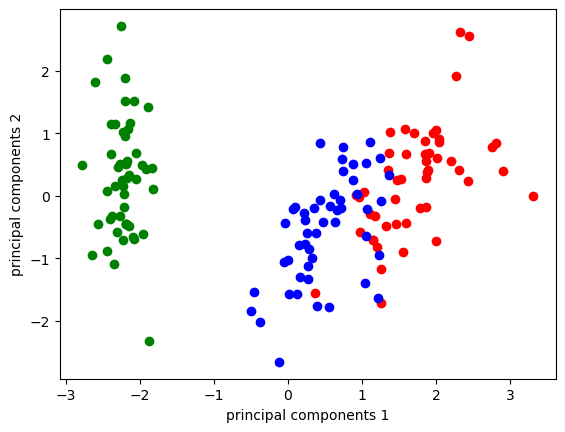

In [8]:
dfsetosa=final_dataframe[df.target=='Iris-setosa']
dfvirginica=final_dataframe[df.target=='Iris-virginica']
dfversicolor=final_dataframe[df.target=='Iris-versicolor']
plt.xlabel('principal components 1')
plt.ylabel('principal components 2')
plt.scatter(dfsetosa['principal components 1'],dfsetosa['principal components 2'],color='green')
plt.scatter(dfvirginica['principal components 1'],dfvirginica['principal components 2'],color='red')
plt.scatter(dfversicolor['principal components 1'],dfversicolor['principal components 2'],color='blue')

Daha profesyonel bir plotting yapalım

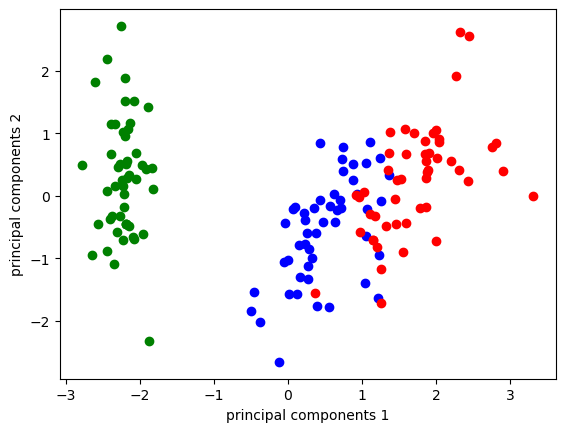

In [11]:
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['g','b','r']

plt.xlabel('principal components 1')
plt.ylabel('principal components 2')

for target, col in zip(targets,colors):
    dftemp=final_dataframe[df.target==target]
    plt.scatter(dftemp['principal components 1'],dftemp['principal components 2'],color=col)

In [12]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [13]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

In [15]:
#veri kaybına baktık %4 lük bir kayıp olmuş %50 azaltmamız rağmen kayıp 4